### Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from numpy import linalg as LA
from sklearn.preprocessing import PowerTransformer



### LinearRegression model

In [ ]:
class LinearRegression:
    '''
    A class which implements simple linear regression model using the closed-form solution.

    Constructor:
        __init__(self)
            Initializes a SimpleLinearRegression object.

    Methods:
        fit(self, X, y)
            Fits the simple linear regression model to the given input data X and target variable y.

        predict(self, X)
            Predicts the target variable for the input data X using the trained linear regression model.

    Attributes:
        coefficients (numpy.ndarray): The learned coefficients (intercept and slope) for the linear regression model.
    '''
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Calculate the coefficients using the closed-form solution
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Predict the target variable for X using the coefficients
        predictions = X @ self.coefficients

        return predictions


### Logistic Regression model

In [ ]:
class LogisticRegression:
    '''
      A class which implements logistic regression model with gradient descent.

      Constructor:
          __init__(self, learning_rate=0.01, num_iterations=1000)
              Initializes a LogisticRegression object with the specified learning rate and number of iterations.

      Methods:
          sigmoid(self, z)
              Applies the sigmoid function to the input z and returns the result.

          fit(self, X, y)
              Fits the logistic regression model to the given input data X and target labels y using gradient descent.

          predict(self, X)
              Predicts the binary labels for the input data X using the trained logistic regression model.

          predict_proba(self, X)
              Predicts the probabilities of the positive class for the input data X using the trained logistic regression model.

      Attributes:
          learning_rate (float): The learning rate for gradient descent.
          num_iterations (int): The number of iterations for gradient descent.
          weights (numpy.ndarray): The learned weights for the logistic regression model.
          bias (float): The learned bias term for the logistic regression model.
    '''
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias to zeros
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent optimization
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Update weights and bias using gradient descent
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in probabilities]

    def predict_proba(self, X):
       linear_pred = np.dot(X, self.weights) + self.bias
       return self.sigmoid(linear_pred)

In [ ]:
class LogisticRegression2:
    '''
    A class which implements logistic regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.coefficients = None
        self.intercept = None
        self.feature_names = None

    @staticmethod
    def _sigmoid(x):
        '''
        Private method, used to pass results of the line equation through the sigmoid function.

        :param x: float, prediction made by the line equation
        :return: float
        '''
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the logistic regression model.

        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize coefficients
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            probability = self._sigmoid(linear_pred)

            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (np.dot(X.T, (probability - y)))
            partial_d = (1 / X.shape[0]) * (np.sum(probability - y))

            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d

    def predict_proba(self, X):
        '''
        Calculates prediction probabilities for a given threshold using the line equation
        passed through the sigmoid function.

        :param X: array, features
        :return: array, prediction probabilities
        '''
        linear_pred = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_pred)

    def predict(self, X, threshold=0.5):
        '''
        Makes predictions using the line equation passed through the sigmoid function.

        :param X: array, features
        :param threshold: float, classification threshold
        :return: array, predictions
        '''
        probabilities = self.predict_proba(X)
        return [1 if i > threshold else 0 for i in probabilities]

### PCA

In [ ]:
class PCA:
    '''
    A class which implements Principal Component Analysis (PCA).

    Constructor:
        __init__(self, n_components)
            Initializes a PCA object with the specified number of components.

    Methods:
        fit(self, X)
            Fits the PCA model to the given input data X.

        transform(self, X)
            Transforms the input data X into the reduced dimensional space using the learned PCA components.

    Attributes:
        n_components (int): The number of components to retain in the reduced dimensional space.
        components (numpy.ndarray): The learned principal components.
        mean (numpy.ndarray): The mean values of each feature in the input data.
    '''
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Compute the mean of each feature
        self.mean = np.mean(X, axis=0)

        # Center the data
        X_centered = X - self.mean

        # Compute the covariance matrix
        covariance = np.cov(X_centered.T)

        # Perform eigenvalue decomposition
        eigenvalues, eigenvectors = np.linalg.eig(covariance)

        # Sort the eigenvectors based on eigenvalues
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top-k eigenvectors
        self.components = sorted_eigenvectors[:, :self.n_components]

    def transform(self, X):
        # Center the data
        X_centered = X - self.mean

        # Project the data onto the selected components
        X_transformed = np.dot(X_centered, self.components)

        return X_transformed


### Loading the data

In [ ]:
### loading the data from google drive directory
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder

drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/reg_proj/train.csv'
test_path = '/content/drive/MyDrive/reg_proj/test.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

train = train.drop(["id", "host_id"], axis=1)
len_of_org_train = len(train)

print(f"The lenght of the train data before the preprocessing: {len_of_org_train}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The lenght of the train data before the preprocessing: 6759


### Preprocessing of the data

In [ ]:
train = train.sample(frac=1, random_state=2023)  # Shuffling the data in order to exclude any bias
train = train.dropna(subset=["expensive"]) # droping any null values in the Y
th = 0.2
train = train.dropna(thresh=int(train.shape[0] * th), axis=1)  # Only drop columns which have at least X% non-NaNs
print(f'Removed {len_of_org_train - len(train)} records with at least {th*100}% non-NaNs')

len_of_new_train = len(train.columns)
print(f"The lenght of the train data after the preprocessing: {len_of_new_train}")

Removed 0 records with at least 20.0% non-NaNs
The lenght of the train data after the preprocessing: 52


In [ ]:
moved_column = train["expensive"]
train = train.drop("expensive", axis=1)
train["expensive"] = moved_column

In [ ]:
def feature_engineering(data):
  '''
  function that performs various transformations and manipulations on the input dataset
  '''
  data.replace("N/A", pd.NA, inplace=True)

  # Drop datetime columns from the dataset
  data = data.drop(['host_since', 'first_review', 'last_review'], axis=1)

  # Define the columns where you want to replace values
  selected_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable', ]
  # Replace "f" with 0 and "t" with 1 in the selected columns
  data[selected_columns] = data[selected_columns].replace({"f": 0, "t": 1})

  # Create new feature
  data['amenities_len'] = data['amenities'].apply(lambda x: len(x) if not pd.isnull(x) else np.nan)
  data = data.drop('amenities', axis=1)

  # Create new feature
  data['host_verifications_len'] = data['host_verifications'].apply(lambda x: len(x) if not pd.isnull(x) else np.nan)
  data = data.drop('host_verifications', axis=1)

  data['host_response_rate'] = pd.to_numeric(data['host_response_rate'].str.rstrip('%'), errors='coerce') / 100
  data['host_acceptance_rate'] = pd.to_numeric(data['host_acceptance_rate'].str.rstrip('%'), errors='coerce') / 100

  data = data.drop('license', axis=1)
  data['beds_per_bedroom'] = data['beds'].div(data['bedrooms']).fillna(np.nan)

  return data


train = feature_engineering(train)

In [ ]:
correlation_threshold = 0.05  # Set the correlation threshold

# Calculate the correlation matrix
all_columns = train.columns.tolist()
all_columns.remove('expensive')
categorical_cols = train.select_dtypes(exclude=['int', 'float']).columns
numerical_cols = train.select_dtypes(include=['int', 'float']).columns
def get_corr_columns(all_columns, data):

  # Calculate the correlation between selected columns and the 'expensive' column
  correlation_expensive = data[all_columns].corrwith(data['expensive'])
  # Get the columns with positive correlation above the threshold
  positive_corr_cols = correlation_expensive[abs(correlation_expensive) > correlation_threshold].index.tolist()
  return positive_corr_cols

positive_corr_cols = get_corr_columns(all_columns, train)

print(f"positive_corr_cols: {positive_corr_cols}")
print(f"The categorical columns: {categorical_cols}")

categorical_cols = categorical_cols.tolist()
union_features = list(set(categorical_cols) | set(positive_corr_cols))

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
# Encode the categorical columns
encoder.fit(train[categorical_cols])

positive_corr_cols: ['host_acceptance_rate', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_checkin', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'amenities_len']
The categorical columns: Index(['host_response_time', 'property_type', 'room_type', 'bathrooms_text'], dtype='object')


<ipython-input-310-150b1e8f01c5>:11: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_expensive = data[all_columns].corrwith(data['expensive'])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
              sparse_output=False)

array([[<Axes: title={'center': 'host_acceptance_rate'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'minimum_maximum_nights'}>,
        <Axes: title={'center': 'availability_30'}>,
        <Axes: title={'center': 'availability_60'}>,
        <Axes: title={'center': 'availability_90'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>,
        <Axes: title={'center': 'number_of_reviews_l30d'}>,
        <Axes: title={'center': 'review_scores_checkin'}>,
        <Axes: title={'center': 'review_scores_value'}>],
       [<Axes: title={'center': 'instant_bookable'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'calculated_host_listings_count_entire_homes'}

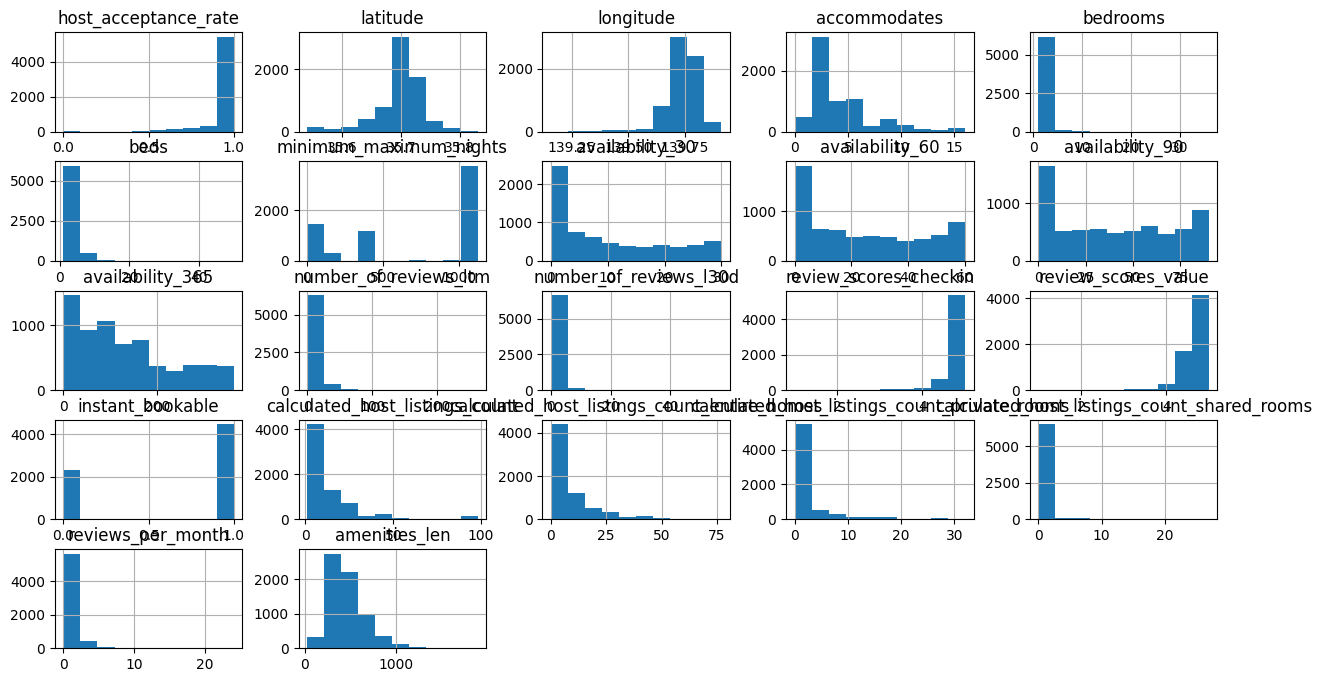

In [ ]:
# Presenting an histogram of the cols that are positive correlated with expensive col
train[positive_corr_cols].hist(figsize=(15,8))

<ipython-input-312-b0397ccd3701>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grahpic_dummy['expensive'] = train['expensive']


<Axes: >

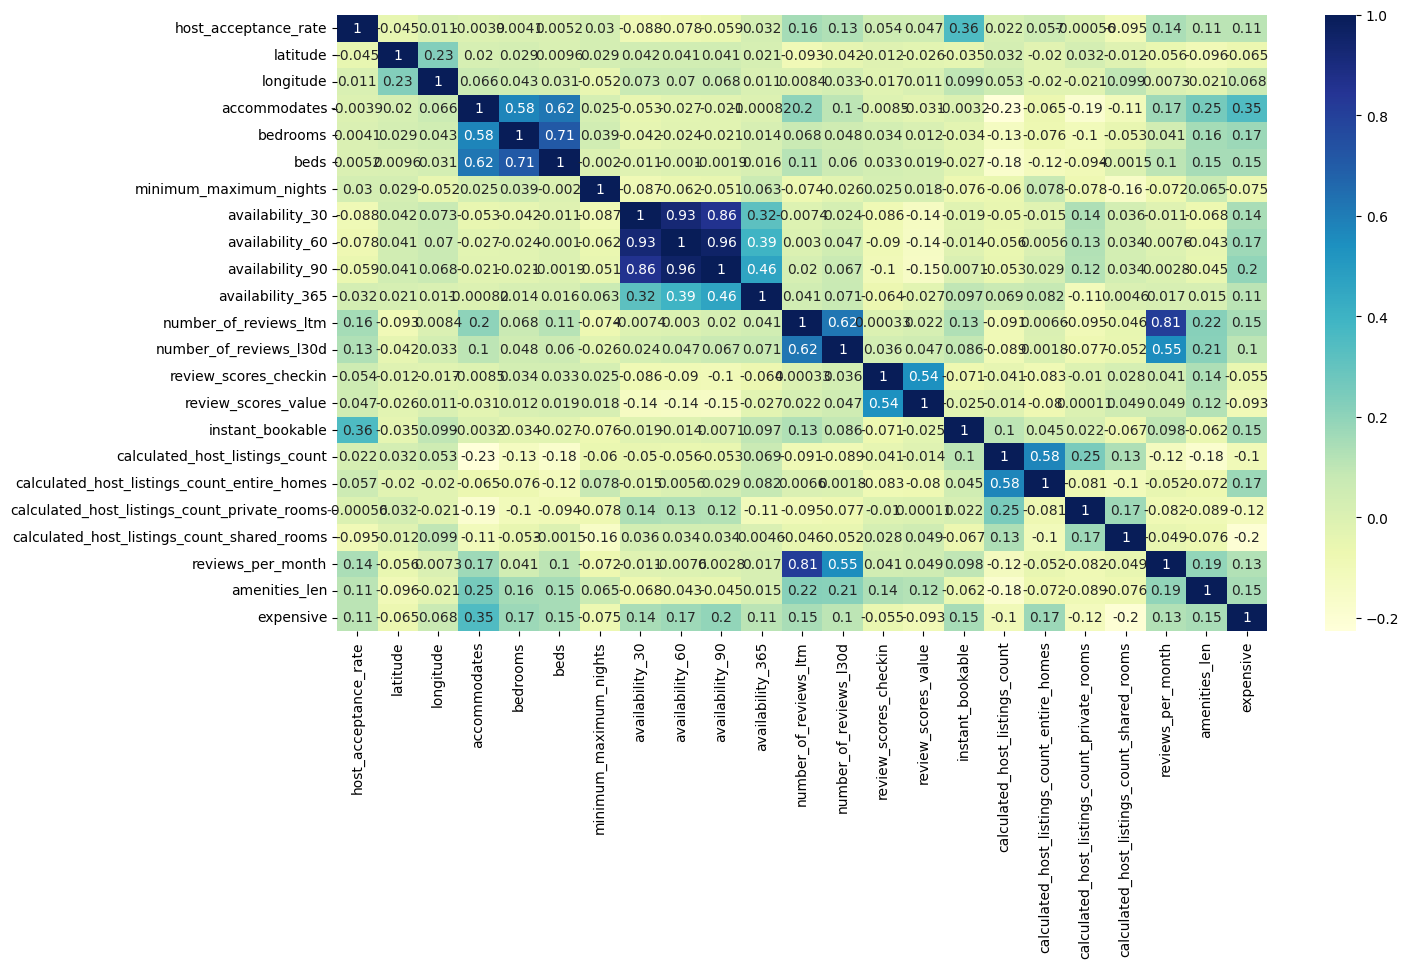

In [ ]:
# showing an heatmap of correlated attributes
grahpic_dummy = train[positive_corr_cols]
grahpic_dummy['expensive'] = train['expensive']
plt.figure(figsize=(15,8))
sns.heatmap(grahpic_dummy.corr(), annot=True, cmap='YlGnBu')

In [ ]:
def data_preprocessing(data, categorical_cols, positive_corr_cols, encoder):
  '''
  function that applies preprocessing operations to the input dataset
  '''
  X_encoded = encoder.transform(data[categorical_cols])

  # Convert the encoded data to a DataFrame
  X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
  # Concatenate the encoded data with the remaining columns
  X_encoded = pd.concat([X_encoded, data[positive_corr_cols]], axis=1)

  # Initialize KNNImputer
  imputer = KNNImputer(n_neighbors=10, metric='nan_euclidean')
  # Fit and transform the encoded data
  imputed_data = imputer.fit_transform(X_encoded)

  X_encoded = pd.DataFrame(imputed_data, columns=X_encoded.columns)

  for col in positive_corr_cols:
    data[col] = np.where(data[col] > 0, np.log(data[col]), data[col])

  return X_encoded



In [ ]:
train

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,expensive,amenities_len,host_verifications_len,beds_per_bedroom
1845,within an hour,1.0,1.00,1.0,30,37,1,1,35.631510,139.644110,...,1,8,0,8,0,0.34,1,500,18,2.0
6304,within an hour,1.0,0.99,0.0,18,23,1,1,35.675840,139.782280,...,1,18,18,0,0,0.99,1,309,18,1.0
4085,NaN,NaN,NaN,0.0,1,3,1,1,35.702630,139.698490,...,0,1,1,0,0,0.31,1,456,9,2.0
4759,within an hour,1.0,0.95,0.0,20,44,1,1,35.701150,139.705660,...,0,19,19,0,0,1.00,0,192,18,1.0
6275,within an hour,1.0,1.00,1.0,69,89,1,1,35.686910,139.721770,...,1,56,41,15,0,0.45,1,457,32,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6049,within an hour,1.0,1.00,0.0,3,3,1,1,35.567900,139.740900,...,1,3,3,0,0,0.64,1,832,18,2.0
2743,within an hour,1.0,1.00,1.0,4,4,1,1,35.629420,139.632590,...,1,4,4,0,0,4.22,1,546,18,1.0
6598,within an hour,1.0,1.00,1.0,28,28,1,1,35.674420,139.466510,...,1,27,0,27,0,1.00,0,186,18,1.0
5657,within an hour,1.0,1.00,0.0,12,12,1,1,35.702381,139.777374,...,1,12,4,8,0,0.61,1,429,18,1.0


In [ ]:
X_encoded = data_preprocessing(train, categorical_cols, positive_corr_cols, encoder)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler to the data and transform the data
scaler.fit(X_encoded)

X_encoded = scaler.transform(X_encoded)
# Convert back to a DataFrame
X_encoded = pd.DataFrame(X_encoded)

pca = PCA(n_components=150)  # Retain 95% of the variance
pca.fit(X_encoded)
X_encoded = pca.transform(X_encoded)
X_encoded = pd.DataFrame(X_encoded)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
X_encoded

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,-0.960767,-0.164119,-0.642814,-0.469626,-0.156601,-0.152478,0.062853,-0.310321,0.043252,-0.017444,...,-0.000721,0.000061,-0.006278,0.004740,0.003464,-0.002019,-0.000935,0.000156,-0.000120,3.147778e-16
1,0.712253,0.557637,0.229513,-0.114583,-0.170294,-0.464158,0.209123,-0.014797,-0.002566,0.004166,...,-0.001618,0.001047,-0.000233,0.000309,0.002241,-0.000003,0.000270,-0.000208,0.000043,5.076978e-17
2,0.669052,0.393965,-0.797555,0.886267,-0.099834,0.492760,-0.615384,0.219979,0.246361,-0.392519,...,0.000345,-0.000290,0.000694,-0.000187,0.001703,0.000961,-0.000362,-0.001144,-0.000563,2.571246e-16
3,0.711572,0.898345,-0.740242,-0.369726,-0.101286,-0.225026,0.056860,-0.028578,-0.024192,-0.002688,...,-0.000204,0.000714,-0.000334,-0.000358,-0.000271,-0.000475,-0.000205,-0.000376,-0.000105,1.428265e-16
4,0.078927,0.038854,-0.556059,-0.608046,0.827390,-0.525391,-0.613128,0.101697,0.068437,-0.026088,...,-0.000059,-0.000388,-0.000131,0.000655,-0.000869,-0.001225,0.000014,-0.000140,-0.000195,7.534586e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6754,0.721717,0.629351,0.398281,-0.055730,-0.205403,0.105422,-0.108660,-0.028563,0.007613,-0.002962,...,0.000245,0.000550,0.000077,-0.000477,0.000122,0.000063,0.000016,-0.000134,0.000141,-2.099877e-16
6755,0.722066,0.211506,-0.512475,-0.325878,-0.162129,0.356260,-0.256410,-0.035299,-0.007714,-0.021917,...,-0.000444,0.000907,-0.000698,0.000013,-0.001154,-0.000782,0.000322,0.001597,0.000107,-1.206162e-17
6756,-1.224179,0.050642,0.536832,-0.195870,-0.639780,0.202850,-0.269215,0.346361,-0.144605,-0.057060,...,0.000880,-0.000152,0.000526,-0.000311,0.000506,0.000790,-0.003236,-0.000819,-0.000031,-4.025067e-17
6757,-1.064945,0.103356,0.608902,-0.229410,0.198082,0.104152,-0.539607,0.281975,-0.015281,-0.110471,...,0.000031,-0.000808,-0.002804,0.002519,0.000438,0.002478,0.001093,0.004669,0.000415,4.288068e-16


In [ ]:
X_encoded['expensive'] = moved_column
X = X_encoded.drop('expensive', axis=1)  # Features
y = X_encoded['expensive']  # Target variable

In [ ]:
null_values = X.isnull()

# Check if any null values exist
any_null = null_values.any().any()

if any_null:
    print("The dataset contains null values.")
else:
    print("The dataset does not contain any null values.")

The dataset does not contain any null values.


In [ ]:
# fit the models
model = LogisticRegression()
model.fit(X, y)

modelsk = SklearnLogisticRegression()
modelsk.fit(X, y)

lgmodel = LogisticRegression2()
lgmodel.fit(X, y)

In [ ]:
# Applying data preprocessing and feature engineering techniques to the test data
test = feature_engineering(test)
test_x = data_preprocessing(test, categorical_cols, positive_corr_cols, encoder)
test_x = scaler.transform(test_x) # encoding
test_x = pd.DataFrame(test_x)
test_x = pca.transform(test_x)

# Convert back to a DataFrame
test_x = pd.DataFrame(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Making prediction on the test data using our model and sklearn model
test_pred = model.predict_proba(test_x)
# print(f"Number of 0 predict: {test_pred.count(0)}") # for predict method
print(f"Number of 0 predict first model: {np.count_nonzero(test_pred < 0.5)}") # for predict_proba method
print(test_pred)
ts = modelsk.predict(test_x)
print(f"Number of 0 predict sklearn model : {np.count_nonzero(ts < 0.5)}")
print(ts.tolist())
ls_pred = lgmodel.predict_proba(test_x)
# print(f"Number of 0 predict: {ls_pred.count(0)}")
print(f"Number of 0 predict second model: {np.count_nonzero(ls_pred < 0.5)}")
print(ls_pred)

Number of 0 predict first model: 0
[0.69886533 0.71239576 0.78015539 ... 0.78144888 0.76184696 0.76009556]
Number of 0 predict sklearn model : 328
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 

### Craeting CSV file out of results

In [ ]:
ids = np.arange(6760, 9787, dtype=np.int32)
# Convert test_pred to an array with a shape of (num_samples, 1)
test_pred_array = np.array(ls_pred).reshape(-1, 1)
# Combine the id and test_pred_array into a single array
data = np.column_stack((ids, test_pred_array))
# Save the data to a CSV file
file_path = '/content/drive/MyDrive/reg_proj/scores.csv'
np.savetxt(file_path, data, delimiter=',', fmt='%d,%f', header='id,expensive', comments='')

### Applying LinearRegression model

In [ ]:
regression = LinearRegression()
# Fit the model on the training data
regression.fit(X, y)

# Make predictions on the test data
predictions = regression.predict(test_x)

binary_predictions = (predictions > 0.5).astype(int)

print(binary_predictions)
print(f"Number of 0 predict: {np.count_nonzero(binary_predictions == 0)}")
print(f"Number of 1 predict: {np.count_nonzero(binary_predictions == 1)}")

[1 1 1 ... 1 1 1]
Number of 0 predict: 255
Number of 1 predict: 2772


### Creating Linear Regression formula

In [ ]:
intercept = regression.coefficients[0]  # Intercept term
coefficients = regression.coefficients[1:]  # Coefficients for predictor variables

# Construct the linear formula
linear_formula = f"y = {intercept} + "
for i, coefficient in enumerate(coefficients):
    linear_formula += f"{coefficient} * x{i+1} + "
linear_formula = linear_formula[:-3]  # Remove the extra "+ " at the end

print(linear_formula)


y = 0.7188795038488999 + 0.011812966094929222 * x1 + 0.13175585082626193 * x2 + 0.14687644068888484 * x3 + -0.0029486098189970816 * x4 + -0.02661751225675451 * x5 + 0.024879809753255724 * x6 + -0.006041181876209887 * x7 + -0.019068350666162876 * x8 + -0.014604042846120519 * x9 + -0.2219736977305469 * x10 + 0.07219711390223339 * x11 + -0.139840067009346 * x12 + -0.251208906186775 * x13 + -0.13495184750226663 * x14 + 0.5584606863096677 * x15 + 0.3690728163017858 * x16 + 0.15653320707367158 * x17 + -0.14187165213032288 * x18 + 0.11802312061682305 * x19 + -0.803609060497302 * x20 + -0.2188620980653486 * x21 + -0.2007005002020709 * x22 + -0.1386922895118394 * x23 + -0.041193574883827265 * x24 + -0.42590764739664483 * x25 + -0.03740133019251909 * x26 + -0.012358208676554072 * x27 + 0.24240059559005175 * x28 + -0.40123549289985494 * x29 + 0.07687806331087815 * x30 + 0.07996274778221417 * x31 + 0.2572829885028724 * x32 + 0.5254705154488993 * x33 + 0.35775333637580914 * x34 + 0.3240917942433588

### Creating Logistic Regression formula

In [ ]:
# Extract the coefficients, intercept, and feature names
coefficients = lgmodel.weights
intercept = lgmodel.bias
cnt = 1
# Print the regression equation
equation = "y = %.4f" % intercept
for i in range(len(coefficients)):
    equation += " + %.4f * X%s" % (coefficients[i], cnt)
    cnt += 1
print(equation)

y = 1.0441 + -0.0285 * X1 + 0.7562 * X2 + 0.7160 * X3 + 0.1053 * X4 + -0.0374 * X5 + 0.0271 * X6 + 0.0362 * X7 + -0.0743 * X8 + 0.1101 * X9 + -0.1366 * X10 + 0.2045 * X11 + -0.2406 * X12 + -0.4096 * X13 + 0.0841 * X14 + 1.8457 * X15 + -0.1900 * X16 + -0.1427 * X17 + -0.3245 * X18 + -0.3331 * X19 + -1.6426 * X20 + -0.2550 * X21 + -0.4206 * X22 + -0.0960 * X23 + 0.2920 * X24 + -0.2962 * X25 + 0.0790 * X26 + 0.1068 * X27 + -0.0670 * X28 + -0.3294 * X29 + 0.1460 * X30 + 0.0515 * X31 + 0.0043 * X32 + 0.3904 * X33 + 0.0985 * X34 + 0.1573 * X35 + -0.2935 * X36 + 0.3835 * X37 + -0.1774 * X38 + 0.3020 * X39 + -0.0852 * X40 + -0.1985 * X41 + 0.1439 * X42 + 0.0025 * X43 + 0.0187 * X44 + 0.0062 * X45 + 0.0358 * X46 + -0.0252 * X47 + 0.0420 * X48 + -0.0292 * X49 + -0.0227 * X50 + 0.0169 * X51 + -0.0027 * X52 + -0.0859 * X53 + 0.0464 * X54 + -0.0341 * X55 + -0.0019 * X56 + -0.0613 * X57 + 0.0033 * X58 + 0.0322 * X59 + -0.0075 * X60 + -0.0123 * X61 + 0.0098 * X62 + 0.0371 * X63 + -0.0441 * X64 + -0.0